Using cache found in /Users/donoduong/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-20 Python-3.11.6 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 1772695 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 
Using cache found in /Users/donoduong/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-20 Python-3.11.6 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


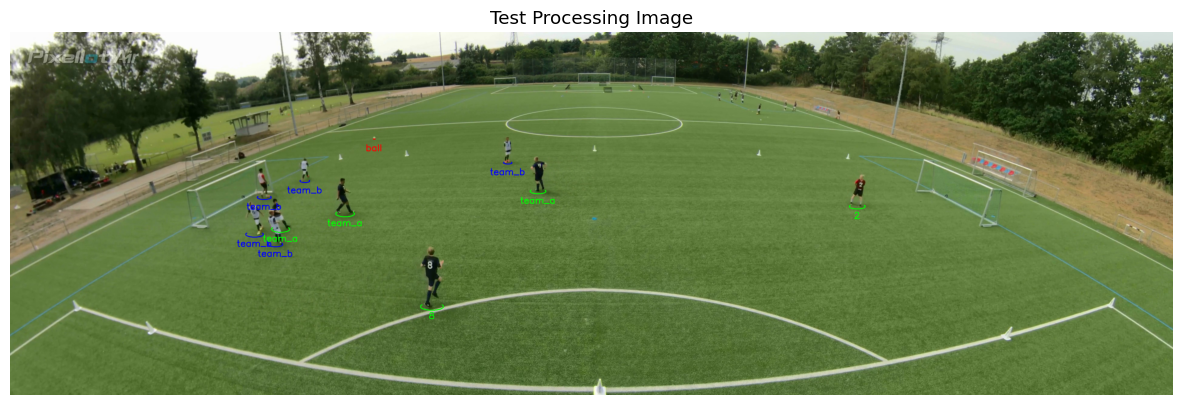

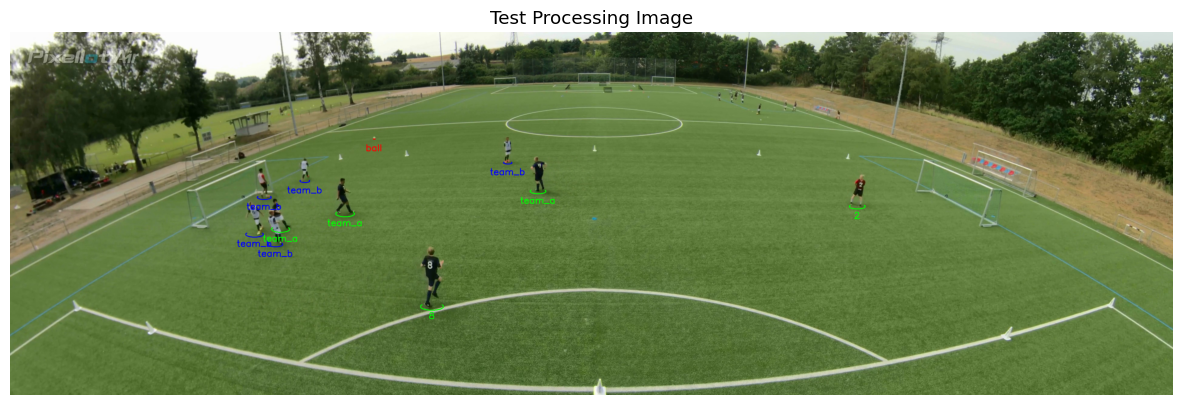

Processed file saved to: 
output/processed_test_3_img.jpg


In [4]:
import matplotlib.pyplot as plt
import torch, cv2
import numpy as np
import os
from pathlib import Path
from src.utils.functions import process_image
%matplotlib inline

def get_unique_id() -> int:
    id_counter = 0
    return id_counter

digit_detector = torch.hub.load('ultralytics/yolov5', 'custom', path="src/models/digit_model_test.pt")
football_detector = torch.hub.load('ultralytics/yolov5', 'custom', path="src/models/football_yolo5s_all_classes.pt")

image_path = "./test_data/test_3_img.jpg"
file_name = Path(image_path).name

image = cv2.imread(image_path)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

detected_objects, rgb = process_image(rgb, football_detector, digit_detector, get_unique_id)

plt.figure(figsize=(15, 8))
plt.imshow(rgb)
plt.axis("off")
plt.title("Test Processing Image")
plt.show()

save_path = f"output/processed_{file_name}"
success = cv2.imwrite(save_path, cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))
if success: 
    print(f"Processed file saved to: \n{save_path}")



In [2]:
from pprintpp import pprint
for detected_object in detected_objects:
    pprint(detected_object)

{
    'bbox': (2771, 472, 2824, 578),
    'class_id': 3,
    'confidence': 0.9621915817260742,
    'id': 0,
    'jerseys': [
        {
            'bbox': (
                30.25281524658203,
                23.52153778076172,
                45.9499626159668,
                44.21126937866211,
            ),
            'class_id': 2,
            'confidence': 0.5524366497993469,
            'id': 0,
            'name': 2,
        },
    ],
    'label': 'team_a',
}
{
    'bbox': (1355, 709, 1432, 908),
    'class_id': 3,
    'confidence': 0.9618266224861145,
    'id': 0,
    'jerseys': [
        {
            'bbox': (
                19.80312156677246,
                44.29292678833008,
                44.878448486328125,
                80.62080383300781,
            ),
            'class_id': 8,
            'confidence': 0.5491917729377747,
            'id': 0,
            'name': 8,
        },
    ],
    'label': 'team_a',
}
{
    'bbox': (1075, 483, 1138, 602),
    'class_id': 3,

In [3]:
video_path = "./test_data/good_perform_4_vid.mp4"
video_name = Path(video_path).name
output_path = os.path.join("output", f"processed_{video_name}")

try: 
    cap = cv2.VideoCapture(video_path)
    # Get original video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # type: ignore
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    current_frame = 0
    last_progress = -1
    with torch.no_grad():
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret or frame is None:
                break
            
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
            detected_objects, rgb = process_image(rgb, football_detector, digit_detector, get_unique_id)
            out.write(cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))
            
            current_frame += 1
            progress = int((current_frame / total_frames) * 100)
            

            if progress % 10 == 0 and progress != last_progress:
                print(f"Progress: {progress}/100")
                last_progress = progress

            # Clean up to avoid CUDA OOM
            del detected_objects
            del rgb
            torch.cuda.empty_cache()

    # Release everything
    cap.release()
    out.release()
    cv2.destroyAllWindows() 
    print("\n==============================================================================================")
    print(f"Video has been processed, saving to:\n{output_path}")
except Exception as e:
    print(f"Processing failed:\n{str(e)}")

Progress: 0/100
Progress: 10/100
Progress: 20/100
Progress: 30/100
Progress: 40/100
Progress: 50/100
Progress: 60/100
Progress: 70/100
Progress: 80/100
Progress: 90/100
Progress: 100/100

Video has been processed, saving to:
output/processed_good_perform_4_vid.mp4
